In [ ]:
'''
Fontes:
Dados Abertos SP - shapefile
- DEINFO_DISTRITO.shp:
http://dados.prefeitura.sp.gov.br/pt_PT/dataset/distritos/resource/9e75c2f7-5729-4398-8a83-b4640f072b5d

Rede Social de Cidades / Nossa São Paulo - remuneracao media do emprego formal
https://www.redesocialdecidades.org.br/br/SP/sao-paulo/regiao/+aricanduva/remuneracao-media-do-emprego-formal
'''

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [4]:
# Obter remnuração média por distrito da cidade de São Paulo
df_remu = pd.read_excel('./remuneracao-distrito-sp/correspondencia-distrito-zonas-sp.xlsx')

In [5]:
df_remu = df_remu[['COD_DIST', 'Distrito', 'Valor']]
df_remu.sort_values('COD_DIST', inplace=True)
df_remu = df_remu.set_index('COD_DIST')

In [6]:
mapa = gpd.read_file('./geo/layerdistrito/LAYER_DISTRITO/DEINFO_DISTRITO.shp')
mapa.drop(['CLASSID','FEATID','REVISIONNU','NOME_DIST','SIGLA_DIST','COD_SUB','DATA_CRIAC','USUARIO_ID'], axis=1, inplace=True)
mapa['COD_DIST'] = mapa['COD_DIST'].astype(int)
mapa.sort_values('COD_DIST', inplace=True)
mapa = mapa.set_index('COD_DIST')

In [7]:
mapa_remu = mapa.join(df_remu)
mapa_remu.sort_values('Valor', ascending=False, inplace=True)

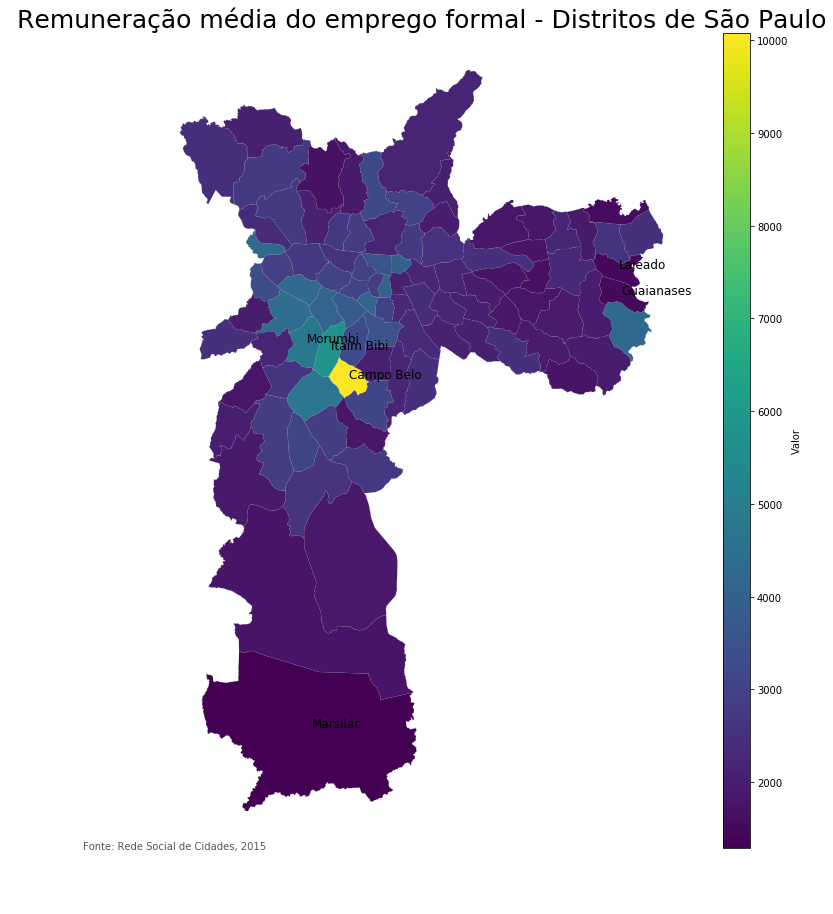

In [8]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, figsize=(15,15))

mapa_remu["center"] = mapa_remu["geometry"].centroid
df_points = mapa_remu.copy()
df_points.set_geometry("center", inplace = True)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)

ax = mapa_remu.plot(column='Valor', legend=True,
                       legend_kwds={'label': 'Valor', 'orientation': 'vertical'}, 
                       linewidth=0.1, ax=ax, cax=cax, edgecolor='grey')

for x, y, label in zip(df_points[:3].geometry.x, df_points[:3].geometry.y, df_points[:3]['Distrito']):
    ax.annotate(label, xy=(x, y), xytext=(1,1), textcoords="offset points", fontsize=12)
    
for x, y, label in zip(df_points[-3:].geometry.x, df_points[-3:].geometry.y, df_points[-3:]['Distrito']):
    ax.annotate(label, xy=(x, y), xytext=(1,1), textcoords="offset points", fontsize=12)

ax.set_axis_off()
ax.set_title('Remuneração média do emprego formal - Distritos de São Paulo' , fontdict={'fontsize':'25', 'fontweight':'3'})
ax.annotate('Fonte: Rede Social de Cidades, 2015', xy=(0.1,0.08),
            xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=10, color='#555555')

plt.show()
fig.savefig('remuneracao-media-distritos.png')